## Importando Bibliotecas e Lendo arquivo

In [144]:
!pip install -U plotly

In [145]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

In [99]:
df = pd.read_csv("historico_regiao_nordeste.csv")
df

,Unnamed: 0,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,-,-,-,-,-,185,769,2817,9531,11339,3543,2043,30227
1,1999,490,272,241,111,100,169,583,2031,4126,6537,2561,1611,18832
2,2000,72,106,162,99,142,318,531,2036,5055,10018,3640,2023,24202
3,2001,121,116,7,43,292,342,1317,4485,12226,14927,8736,2413,45025
4,2002,270,630,306,253,350,523,2901,8169,16617,18400,15334,8249,72002
5,2003,2326,516,571,739,563,1470,4056,4667,22278,20040,16441,9669,83336
6,2004,963,306,377,371,737,1402,2661,5113,17932,16286,19339,13306,78793
7,2005,2445,578,442,331,313,1109,3093,5492,15823,23891,14851,8569,76937
8,2006,1593,691,499,176,298,870,2296,5105,9145,9959,12720,8203,51555
9,2007,2058,285,417,403,889,2774,5804,19547,27403,23376,13910,7243,104109


## Tratamento do dataframe

In [100]:
df.drop([0 ,1,23,24,25,26], axis=0,inplace=True)
#Foram retirados as linhas dos anos 1998, 1999 e 2021 os quais não são objeto de estudo.
#Foram retiradas também as linhas com os dados de média, máximo e mínimo, pois, a análise será feita diretamente do Dataframe utilizando o Pandas.

In [101]:
#Criado uma nova coluna para o dado dos anos.
df["Ano"]= df["Unnamed: 0"]
df.drop("Unnamed: 0", axis=1,inplace=True)
df.set_index("Ano")

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
Ano,,,,,,,,,,,,,
2000,72,106,162,99,142,318,531,2036,5055,10018,3640,2023,24202
2001,121,116,7,43,292,342,1317,4485,12226,14927,8736,2413,45025
2002,270,630,306,253,350,523,2901,8169,16617,18400,15334,8249,72002
2003,2326,516,571,739,563,1470,4056,4667,22278,20040,16441,9669,83336
2004,963,306,377,371,737,1402,2661,5113,17932,16286,19339,13306,78793
2005,2445,578,442,331,313,1109,3093,5492,15823,23891,14851,8569,76937
2006,1593,691,499,176,298,870,2296,5105,9145,9959,12720,8203,51555
2007,2058,285,417,403,889,2774,5804,19547,27403,23376,13910,7243,104109
2008,1407,672,355,323,372,1010,2354,3418,10459,16631,15153,8842,60996


In [149]:
#Verificanto o tipo dos dados colunares.
df.dtypes
hJaneiro = px.histogram(df,x='Janeiro')
hJaneiro.show()

In [103]:
#Fazendo uma mudança do tipo dos dados colunáres para inteiro.
df.Janeiro = df.Janeiro.astype("int64")
df.Fevereiro = df.Fevereiro.astype("int64")
df.Março = df.Março.astype("int64")
df.Abril = df.Abril.astype("int64")
df.Maio = df.Maio.astype("int64")
df.Novembro = df.Novembro.astype("int64")
df.Dezembro = df.Dezembro.astype("int64")

#FAZER A MUDAÇA DOS DADOS DE ANO PARA DATA??
df.Ano = df.Ano.astype("int64")

In [104]:
#Novos tipos dos dados colunáres.
df.dtypes

Janeiro      int64
Fevereiro    int64
Março        int64
Abril        int64
Maio         int64
Junho        int64
Julho        int64
Agosto       int64
Setembro     int64
Outubro      int64
Novembro     int64
Dezembro     int64
Total        int64
Ano          int64
dtype: object

### Criando um Dataframe transposto para facilitar a criação de alguns graficos e algumas análises

In [105]:
df_transposta = df.T
colunas = df_transposta.loc['Ano'].to_list()
df_transposta.columns = colunas
df_transposta.drop(['Total','Ano'], inplace=True)
df_transposta
#da pra usar esse dataframe para fazer os gráficos de Meses X N° de focos

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Janeiro,72,121,270,2326,963,2445,1593,2058,1407,1923,...,597,1459,885,868,1240,911,671,764,1425,670
Fevereiro,106,116,630,516,306,578,691,285,672,402,...,317,606,618,196,396,759,237,124,596,358
Março,162,7,306,571,377,442,499,417,355,512,...,404,849,671,347,377,389,276,328,625,198
Abril,99,43,253,739,371,331,176,403,323,135,...,340,788,306,321,378,376,236,160,249,251
Maio,142,292,350,563,737,313,298,889,372,87,...,414,1188,385,482,439,504,350,429,375,391
Junho,318,342,523,1470,1402,1109,870,2774,1010,496,...,1592,2306,1137,1415,1381,1281,1012,1355,1295,1176
Julho,531,1317,2901,4056,2661,3093,2296,5804,2354,1856,...,2646,6419,2098,3475,2662,3423,2737,2853,2009,2817
Agosto,2036,4485,8169,4667,5113,5492,5105,19547,3418,3493,...,5665,16283,4065,8312,8404,6704,5200,6135,6276,3831
Setembro,5055,12226,16617,22278,17932,15823,9145,27403,10459,8801,...,16959,19031,9576,9606,17949,6820,13025,8459,9468,9927
Outubro,10018,14927,18400,20040,16286,23891,9959,23376,16631,7653,...,8527,14700,7099,10504,16117,11450,11231,5988,10264,12132


In [106]:
#Verificação dos tipos da transposta
df_transposta.dtypes

2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
dtype: object

##Analise Estatistica dos dados

In [141]:
px.histogram(df_transposta['2000']).show()

KeyError: '2000'

# Não alterei daqui para baixo

In [108]:
#Dados estáticos Gerais por mês.
df.describe()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1151.476190,438.142857,417.285714,317.000000,468.380952,1257.523810,3008.761905,6963.952381,13848.380952,13530.000000,9828.190476,5864.142857,57093.238095,2010.000000
std,678.492124,213.408127,190.178112,179.174775,256.231043,615.204325,1400.857448,4424.160084,6056.795155,5068.924866,4749.649773,2897.229975,20357.051628,6.204837
min,72.000000,106.000000,7.000000,43.000000,87.000000,318.000000,531.000000,2036.000000,5055.000000,5988.000000,3640.000000,2023.000000,24202.000000,2000.000000
25%,671.000000,285.000000,328.000000,236.000000,350.000000,1010.000000,2296.000000,4485.000000,9468.000000,10018.000000,5638.000000,3672.000000,44118.000000,2005.000000
50%,963.000000,402.000000,389.000000,321.000000,391.000000,1281.000000,2737.000000,5492.000000,12226.000000,12132.000000,8497.000000,4924.000000,51555.000000,2010.000000
75%,1513.000000,618.000000,512.000000,376.000000,504.000000,1415.000000,3423.000000,8169.000000,17932.000000,16286.000000,13910.000000,8203.000000,72833.000000,2015.000000
max,2445.000000,759.000000,849.000000,788.000000,1188.000000,2774.000000,6419.000000,19547.000000,27403.000000,23891.000000,19339.000000,13306.000000,104109.000000,2020.000000


##Estudo comparativo mensal - Gráfico Anos x N° de focos e Boxplot

In [109]:
titX = dict(title = 'Anos')
titY = dict(title = 'Queimadas')

titulo = 'Relação entre os anos de 2000 até 2010 e os meses das queimadas'
meses = df.iloc[:,0:12].columns.to_list()

fig1 = px.line(df,x='Ano',y=meses)
fig1.update_layout(
    title = titulo,
    xaxis = titX,
    yaxis = titY,
    legend_title = 'Meses'
)
fig1.show()

###Janeiro

Maxímo: 2445 
Mínimo: 72 
Média: 1151.4761904761904 
Desvio: 678.4921236866069


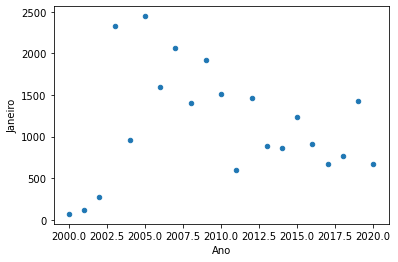

In [110]:
max_jan = df.max()["Janeiro"]
min_jan = df.min()["Janeiro"]
med_jan = df.mean()["Janeiro"]
desv_jan = df.std()["Janeiro"]
df.plot.scatter(x='Ano',y="Janeiro")
print(f"Maxímo: {max_jan} \nMínimo: {min_jan} \nMédia: {med_jan} \nDesvio: {desv_jan}")

In [111]:
px.box(df['Janeiro'])

###Fevereiro

Maxímo: 759 
Mínimo: 106 
Média: 438.14285714285717 
Desvio: 213.40812676987858


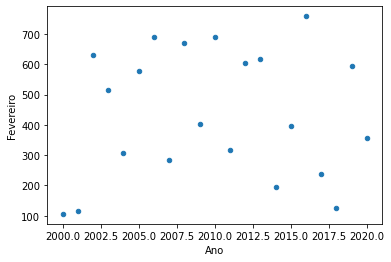

In [112]:
max_fev = df.max()["Fevereiro"]
min_fev = df.min()["Fevereiro"]
med_fev = df.mean()["Fevereiro"]
desv_fev = df.std()["Fevereiro"]
df.plot.scatter(x='Ano',y="Fevereiro")
print(f"Maxímo: {max_fev} \nMínimo: {min_fev} \nMédia: {med_fev} \nDesvio: {desv_fev}")

In [113]:
px.box(df['Fevereiro'])

###Março

Maxímo: 849 
Mínimo: 7 
Média: 417.2857142857143 
Desvio: 190.1781120048106


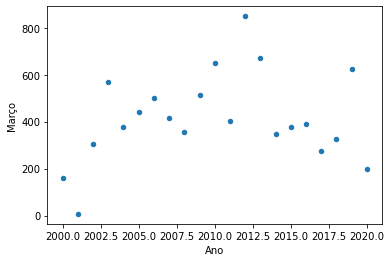

In [114]:
max_mar = df.max()["Março"]
min_mar = df.min()["Março"]
med_mar = df.mean()["Março"]
desv_mar = df.std()["Março"]
df.plot.scatter(x='Ano',y="Março")
print(f"Maxímo: {max_mar} \nMínimo: {min_mar} \nMédia: {med_mar} \nDesvio: {desv_mar}")

In [115]:
px.box(df['Março'])

###Abril

Maxímo: 788 
Mínimo: 43 
Média: 317.0 
Desvio: 179.17477501032337


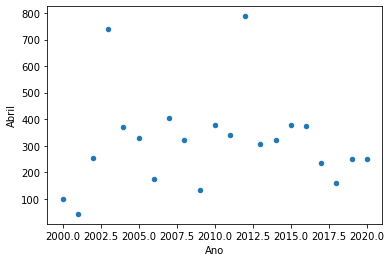

In [116]:
max_abr = df.max()["Abril"]
min_abr = df.min()["Abril"]
med_abr = df.mean()["Abril"]
desv_abr = df.std()["Abril"]
df.plot.scatter(x='Ano',y="Abril")
print(f"Maxímo: {max_abr} \nMínimo: {min_abr} \nMédia: {med_abr} \nDesvio: {desv_abr}")

In [117]:
px.box(df['Abril'])

###Maio

Maxímo: 1188 
Mínimo: 87 
Média: 468.3809523809524 
Desvio: 256.23104343355357


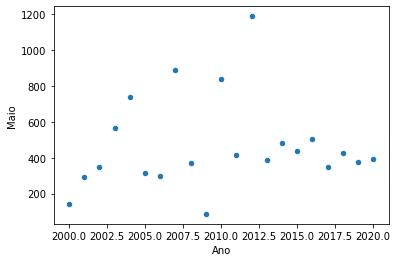

In [118]:
max_mai = df.max()["Maio"]
min_mai = df.min()["Maio"]
med_mai = df.mean()["Maio"]
desv_mai = df.std()["Maio"]
df.plot.scatter(x='Ano',y="Maio")
print(f"Maxímo: {max_mai} \nMínimo: {min_mai} \nMédia: {med_mai} \nDesvio: {desv_mai}")

In [119]:
px.box(df['Maio'])

###Junho

Maxímo: 2774 
Mínimo: 318 
Média: 1257.5238095238096 
Desvio: 615.2043253300175


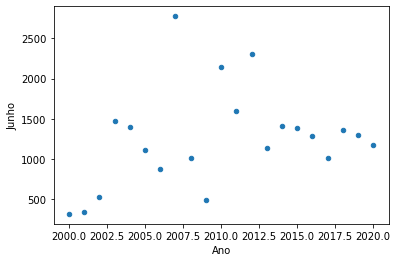

In [120]:
max_jun = df.max()["Junho"]
min_jun = df.min()["Junho"]
med_jun = df.mean()["Junho"]
desv_jun = df.std()["Junho"]
df.plot.scatter(x='Ano',y="Junho")
print(f"Maxímo: {max_jun} \nMínimo: {min_jun} \nMédia: {med_jun} \nDesvio: {desv_jun}")

In [121]:
px.box(df['Junho'])

###Julho

Maxímo: 6419 
Mínimo: 531 
Média: 3008.7619047619046 
Desvio: 1400.85744830664


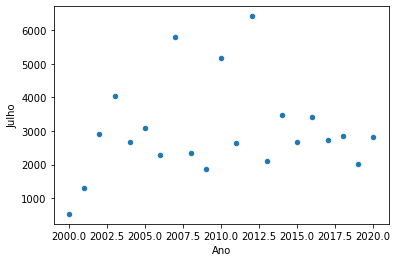

In [122]:
max_jul = df.max()["Julho"]
min_jul = df.min()["Julho"]
med_jul = df.mean()["Julho"]
desv_jul = df.std()["Julho"]
df.plot.scatter(x='Ano',y="Julho")
print(f"Maxímo: {max_jul} \nMínimo: {min_jul} \nMédia: {med_jul} \nDesvio: {desv_jul}")

In [123]:
px.box(df['Julho'])

###Agosto

Maxímo: 19547 
Mínimo: 2036 
Média: 6963.952380952381 
Desvio: 4424.160083859879


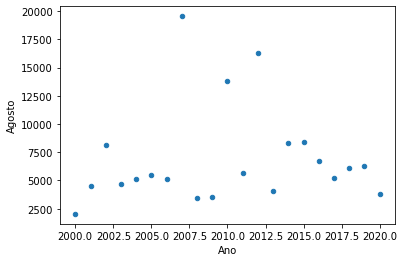

In [124]:
max_ago = df.max()["Agosto"]
min_ago = df.min()["Agosto"]
med_ago = df.mean()["Agosto"]
desv_ago = df.std()["Agosto"]
df.plot.scatter(x='Ano',y="Agosto")
print(f"Maxímo: {max_ago} \nMínimo: {min_ago} \nMédia: {med_ago} \nDesvio: {desv_ago}")

In [125]:
px.box(df['Agosto'])

###Setembro

Maxímo: 27403 
Mínimo: 5055 
Média: 13848.380952380952 
Desvio: 6056.795154833871


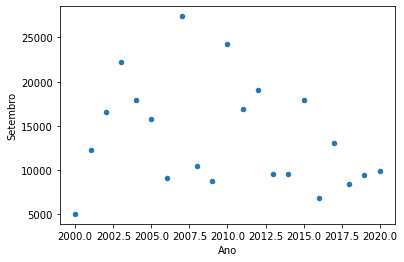

In [126]:
max_set = df.max()["Setembro"]
min_set = df.min()["Setembro"]
med_set = df.mean()["Setembro"]
desv_set = df.std()["Setembro"]
df.plot.scatter(x='Ano',y="Setembro")
print(f"Maxímo: {max_set} \nMínimo: {min_set} \nMédia: {med_set} \nDesvio: {desv_set}")

In [127]:
px.box(df['Setembro'])

###Outubro

Maxímo: 23891 
Mínimo: 5988 
Média: 13530.0 
Desvio: 5068.924866280817


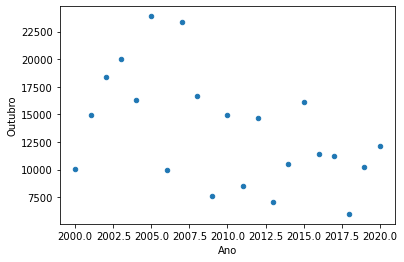

In [128]:
max_out = df.max()["Outubro"]
min_out = df.min()["Outubro"]
med_out = df.mean()["Outubro"]
desv_out = df.std()["Outubro"]
df.plot.scatter(x='Ano',y="Outubro")
print(f"Maxímo: {max_out} \nMínimo: {min_out} \nMédia: {med_out} \nDesvio: {desv_out}")

In [129]:
px.box(df['Outubro'])

###Novembro

Maxímo: 19339 
Mínimo: 3640 
Média: 9828.190476190477 
Desvio: 4749.649772552158


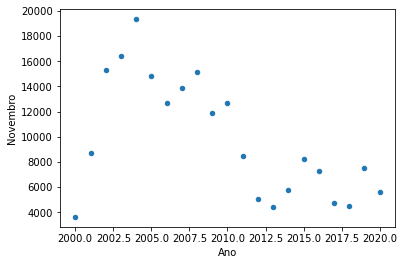

In [130]:
max_nov = df.max()["Novembro"]
min_nov = df.min()["Novembro"]
med_nov = df.mean()["Novembro"]
desv_nov = df.std()["Novembro"]
df.plot.scatter(x='Ano',y="Novembro")
print(f"Maxímo: {max_nov} \nMínimo: {min_nov} \nMédia: {med_nov} \nDesvio: {desv_nov}")

In [131]:
px.box(df['Novembro'])

###Dezembro

Maxímo: 13306 
Mínimo: 2023 
Média: 5864.142857142857 
Desvio: 2897.2299750919715


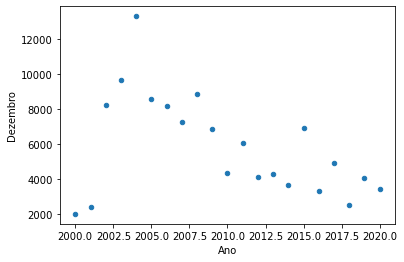

In [132]:
max_dez = df.max()["Dezembro"]
min_dez = df.min()["Dezembro"]
med_dez = df.mean()["Dezembro"]
desv_dez = df.std()["Dezembro"]
df.plot.scatter(x='Ano',y="Dezembro")
print(f"Maxímo: {max_dez} \nMínimo: {min_dez} \nMédia: {med_dez} \nDesvio: {desv_dez}")

In [143]:
px.box(df['Dezembro'])

##Gráfico do crescimento histórico Total e Gráfico Meses x N° de focos.

In [134]:
#COMENTEI ESSA CELULA PQ É PRECISA DE AJUSTES

#figTotal = px.line(df,x='Ano',y="Total")
#figTotal.update_xaxes(ranges)

In [135]:
#FAZER GRÁFICO MESES x N° de Focos Total

#se basear no link mostrado na reunião 

##Correlações

In [136]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
Janeiro,1.000000,0.439879,0.602394,0.499692,0.276256,0.451359,0.478892,0.311540,0.450904,0.478955,0.506075,0.481313,0.605739,-0.046260
Fevereiro,0.439879,1.000000,0.633951,0.393367,0.200359,0.158581,0.295248,0.140831,0.113721,0.192133,0.330928,0.276842,0.291055,0.054714
Março,0.602394,0.633951,1.000000,0.653273,0.531269,0.551853,0.562463,0.427711,0.327787,-0.002842,0.087669,0.168851,0.338143,0.203979
Abril,0.499692,0.393367,0.653273,1.000000,0.759459,0.678139,0.768176,0.502303,0.608621,0.432293,0.214032,0.309509,0.610472,0.035889
Maio,0.276256,0.200359,0.531269,0.759459,1.000000,0.873819,0.896605,0.827199,0.692909,0.374209,0.133753,0.121614,0.651276,0.087837
Junho,0.451359,0.158581,0.551853,0.678139,0.873819,1.000000,0.883367,0.836782,0.705598,0.319066,0.081627,0.085825,0.632337,0.290760
Julho,0.478892,0.295248,0.562463,0.768176,0.896605,0.883367,1.000000,0.878787,0.730518,0.452283,0.167122,0.105879,0.712883,0.140392
Agosto,0.311540,0.140831,0.427711,0.502303,0.827199,0.836782,0.878787,1.000000,0.711255,0.417346,0.078305,-0.027253,0.663707,0.072707
Setembro,0.450904,0.113721,0.327787,0.608621,0.692909,0.705598,0.730518,0.711255,1.000000,0.702103,0.523663,0.445625,0.917484,-0.250807
Outubro,0.478955,0.192133,-0.002842,0.432293,0.374209,0.319066,0.452283,0.417346,0.702103,1.000000,0.666832,0.538682,0.848078,-0.475824
